In [451]:
#import relevant libraries for data descriptions and pre processing
import os
import numpy as np
import pandas as pd
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
%matplotlib inline

In [452]:
import io

In [453]:
from google.colab import files

In [454]:
#use upload function to upload file saved on local machine
data = files.upload()

Saving Video_Games_Sales_as_at_22_Dec_2016.csv to Video_Games_Sales_as_at_22_Dec_2016 (4).csv


In [457]:
#use pandas library to read uploaded csv file
df = pd.read_csv(io.StringIO(data['Video_Games_Sales_as_at_22_Dec_2016 (4).csv'].decode('utf-8')))

In [458]:
#DATA CLEANING AND PRE-PROCESSING

In [459]:
#view the first 5 records in the data set
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [460]:
#Review summary statistics for data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [461]:
#Review descriptive statistics for data set
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [462]:
#check for missing values accross each attribute
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

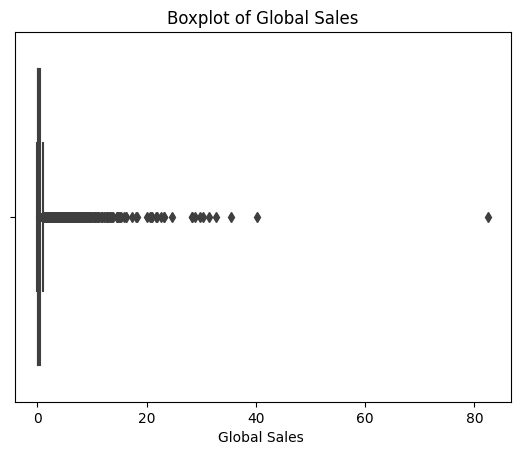

In [463]:
# Plotting a boxplot of 'Critic Scores'
sns.boxplot(x=df['Global_Sales'])
plt.xlabel('Global Sales ')
plt.title('Boxplot of Global Sales')
plt.show()

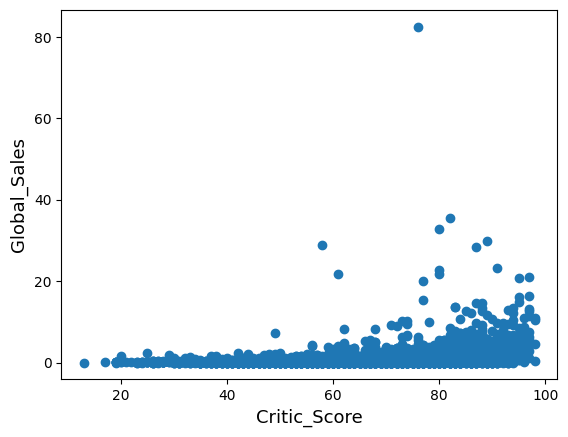

In [464]:
#Check for outliers again but with the dependant variable Global Sales and 1 independant variable Critic Score
fig, ax = plt.subplots()
ax.scatter(x = df['Critic_Score'], y = df['Global_Sales'])
plt.ylabel('Global_Sales', fontsize=13)
plt.xlabel('Critic_Score', fontsize=13)
plt.show()

In [465]:
#Remove the outlier
df = df.drop(df[(df['Critic_Score']>60) & (df['Global_Sales']>60)].index)

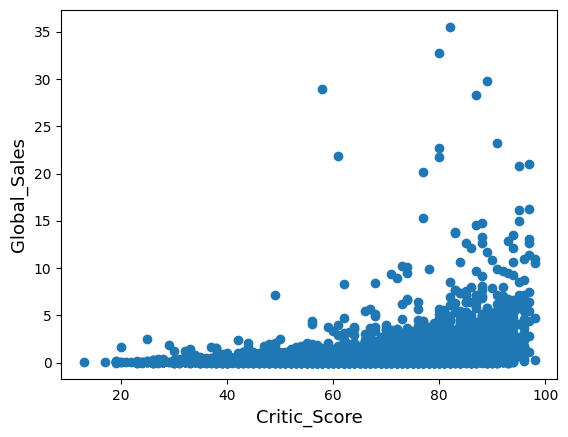

In [466]:
#Check again for outlier
fig, ax = plt.subplots()
ax.scatter(x = df['Critic_Score'], y = df['Global_Sales'])
plt.ylabel('Global_Sales', fontsize=13)
plt.xlabel('Critic_Score', fontsize=13)
plt.show()

In [467]:
# Clear to see that global sales is influenced by sales in other areas pretty highly which makes sense

In [504]:
#check for missing values accross each attribute
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [505]:
#create a new data frame to clean and preserve original dat frame
df_cleaned = df.copy()

In [506]:
print(pd.value_counts(df_cleaned["Platform"]))

PS2     2161
DS      2152
PS3     1331
Wii     1319
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64


In [507]:
#Remove records in data set where Name, Genre, Year_of_Release, and Publisher have missing values
for i, row in df_cleaned.iterrows():
    if pd.isnull(row['Name']) or pd.isnull(row['Genre']) or pd.isnull(row['Year_of_Release']) or pd.isnull(row['Publisher']):
        df_cleaned.drop(i, inplace=True)

In [508]:
#Check missing values in data set after removing
df_cleaned.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8434
Critic_Count       8434
User_Score         6579
User_Count         8955
Developer          6512
Rating             6649
dtype: int64

In [509]:
#Check missing values in data set after removing
df_cleaned.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8434
Critic_Count       8434
User_Score         6579
User_Count         8955
Developer          6512
Rating             6649
dtype: int64

In [510]:
# From here we have cut down a significant amount of missing data
# Lets drop all rows that have NA for Critic Score

In [511]:
df_cleaned = df_cleaned.dropna(subset=['Critic_Score'])

#Check missing values in data set after removing
df_cleaned.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score           33
User_Count         1089
Developer             6
Rating               81
dtype: int64

In [512]:
# Check Data Shape
print(df_cleaned.shape)

(7981, 16)


In [513]:
# Lets impute data for the missing User Score and User Count
# Lets drop missing records for rating and developer as it doesn't make sense to impute


In [514]:
#For Developer and Rating we will drop missing values
df_cleaned = df_cleaned.dropna(subset=['Developer'])
df_cleaned = df_cleaned.dropna(subset=['Rating'])

In [515]:
#There's "tbd" values in this column so we will replace first
df_cleaned['User_Score'] = df_cleaned['User_Score'].replace('tbd', None)

In [516]:
# Convert the feature data type to float
df_cleaned['User_Score'] = df_cleaned['User_Score'].astype(float)

# Print data types
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7900 entries, 2 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7900 non-null   object 
 1   Platform         7900 non-null   object 
 2   Year_of_Release  7900 non-null   float64
 3   Genre            7900 non-null   object 
 4   Publisher        7900 non-null   object 
 5   NA_Sales         7900 non-null   float64
 6   EU_Sales         7900 non-null   float64
 7   JP_Sales         7900 non-null   float64
 8   Other_Sales      7900 non-null   float64
 9   Global_Sales     7900 non-null   float64
 10  Critic_Score     7900 non-null   float64
 11  Critic_Count     7900 non-null   float64
 12  User_Score       6824 non-null   float64
 13  User_Count       6824 non-null   float64
 14  Developer        7900 non-null   object 
 15  Rating           7900 non-null   object 
dtypes: float64(10), object(6)
memory usage: 1.0+ MB


In [517]:
#Now we can handle the N/A and change to median
df_cleaned['User_Score'] = df_cleaned['User_Score'].fillna(df_cleaned['User_Score'].median())

In [518]:
# Fill User count with median value
df_cleaned['User_Count'] = df_cleaned['User_Count'].fillna(df_cleaned['User_Count'].median())


In [519]:
#Check missing values in data set after removing
df_cleaned.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [520]:
# Check Data Shape
print(df_cleaned.shape)

(7900, 16)


In [521]:
# Compare User Score to Critic Score
df_cleaned.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E


In [522]:
# Critic Score is on a different scale
# Now we will multiply User Score by 10 to match the scale

In [523]:
# Iterate over each row in the DataFrame
for index, row in df_cleaned.iterrows():
    # Multiply the feature value by 10
    df_cleaned.at[index, 'User_Score'] = float(row['User_Score']) * 10


In [524]:
# Check Scores are on the same scale

In [525]:
df_cleaned.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,83.0,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,85.0,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,66.0,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,84.0,594.0,Nintendo,E


In [526]:
# Check for duplicate values
# Not a problem because many games release on multiple platforms
df_cleaned[['Name']].duplicated().sum()

2927

In [527]:
# Checking for duplicates with same name and platform
df_cleaned[['Name','Platform']].duplicated(keep=False).sum()

6

In [528]:
#view attributes and values of all records with both Name and Platform having duplicate values
df_cleaned[df_cleaned[['Name','Platform']].duplicated(keep=False)]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
604,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.22,0.00,0.23,2.56,83.0,22.0,55.0,101.0,EA Tiburon,E
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.78,0.01,0.15,1.56,83.0,54.0,85.0,134.0,EA Canada,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.13,0.02,0.10,1.25,83.0,54.0,85.0,134.0,EA Canada,T
5973,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.04,0.29,82.0,19.0,85.0,525.0,Black Box,T
11716,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0.00,0.06,0.00,0.02,0.08,82.0,19.0,85.0,525.0,Black Box,T
16233,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.00,0.01,0.00,0.00,0.01,83.0,22.0,55.0,101.0,EA Tiburon,E


In [529]:
# Drop records that seems like an error.
df_cleaned = df_cleaned.drop(16233)
df_cleaned = df_cleaned.drop(1190)
df_cleaned = df_cleaned.drop(5973)

In [530]:
# Check duplicates again
df_cleaned[['Name','Platform']].duplicated(keep=False).sum()

0

In [531]:
print(df_cleaned.shape) #pre-dummies shape

(7897, 16)


In [532]:
print(df_cleaned.columns)


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')


In [533]:
# Select the categorical columns to be one-hot encoded
categorical_columns = ['Name', 'Genre', 'Publisher', 'Developer', 'Rating', 'Platform']

# Perform one-hot encoding using pandas get_dummies()
data_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns)

# Print the updated dataset with one-hot encoded variables
print(data_encoded.head(5))

   Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
2           2008.0     15.68     12.76      3.79         3.29         35.52   
3           2009.0     15.61     10.93      3.28         2.95         32.77   
6           2006.0     11.28      9.14      6.50         2.88         29.80   
7           2006.0     13.96      9.18      2.93         2.84         28.92   
8           2009.0     14.44      6.94      4.70         2.24         28.32   

   Critic_Score  Critic_Count  User_Score  User_Count  ...  Platform_PS2  \
2          82.0          73.0        83.0       709.0  ...             0   
3          80.0          73.0        80.0       192.0  ...             0   
6          89.0          65.0        85.0       431.0  ...             0   
7          58.0          41.0        66.0       129.0  ...             0   
8          87.0          80.0        84.0       594.0  ...             0   

   Platform_PS3  Platform_PS4  Platform_PSP  Platform_PSV  Platform_

In [534]:
# Drop all other sales as they are highly correlated with Global Sales
data_encoded = data_encoded.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)


In [535]:
# Convert Global Sales to 1 if over 1 or 0 if under 1
data_encoded['Global_Sales'] = data_encoded['Global_Sales'].apply(lambda x: 1 if x > 1 else 0)


In [536]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = data_encoded.drop('Global_Sales', axis=1)  # Adjust the column name of the target variable
y = (data_encoded['Global_Sales'] == 1).astype(int)  # Adjust the column name of the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Let's check the shape of the split data as a precaution
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (6317, 6743)
y_train shape: (6317,)
X_test shape: (1580, 6743)
y_test shape: (1580,)


In [540]:
import time
import sys
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Create a Random Forest Classifier object
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Start measuring training time
start_time = time.time()

# Train the Random Forest Classifier on the training data
rf_classifier.fit(X_train, y_train)

# Calculate training time
training_time = time.time() - start_time

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Evaluate the f-score of the model
f_score = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f_score)

# Calculate memory consumption
memory_usage = sys.getsizeof(rf_classifier)

print("Training Time:", training_time, "seconds")
print("Memory Usage:", memory_usage, "bytes")


Accuracy: 0.8822784810126583
Precision: 0.8760468791415041
F1-score: 0.8678450460555744
Training Time: 17.93269157409668 seconds
Memory Usage: 48 bytes


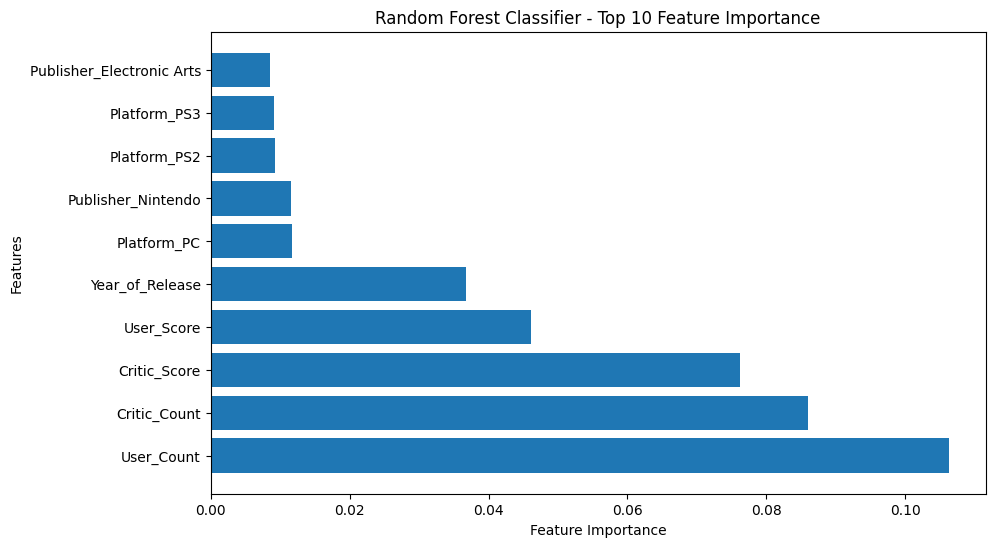

In [542]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

# Get the feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Sort the features and their importances in descending order
indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[indices][:10]
sorted_feature_names = feature_names[indices][:10]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.yticks(range(len(sorted_feature_importances)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Classifier - Top 10 Feature Importance')
plt.show()


In [543]:
import time
import sys
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Create a logistic regression model object
logreg_model = LogisticRegression(max_iter=5000, solver='lbfgs')

# Start measuring training time
start_time = time.time()

# Train the model on the training data
logreg_model.fit(X_train, y_train)

# Calculate training time
training_time = time.time() - start_time

# Calculate training time
training_time = time.time() - start_time

# Make predictions on the test data
y_pred = logreg_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1-score:", f1)

# Calculate memory consumption
memory_usage = sys.getsizeof(rf_classifier)

print("Training Time:", training_time, "seconds")
print("Memory Usage:", memory_usage, "bytes")

Accuracy: 0.8867088607594936
Precision: 0.8790773302443097
F1-score: 0.8782585984913946
Training Time: 359.07771921157837 seconds
Memory Usage: 48 bytes
